In [1]:
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn

In [2]:
import sys
import numpy as np 
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [3]:
my_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")
my_data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [4]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [5]:
''' Es necesario convertir los valores tipo STR a valores numéricos discretos que pueda interpretar el Clasificador '''

from sklearn import preprocessing

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F', 'M'])
X[:,1] = le_sex.transform(X[:,1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [6]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [7]:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [8]:
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [9]:
drugTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [10]:
predTree = drugTree.predict(X_testset)

In [11]:
from sklearn import metrics
import matplotlib.pyplot as plt

print("Decision Tree's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

Decision Tree's Accuracy:  0.9833333333333333


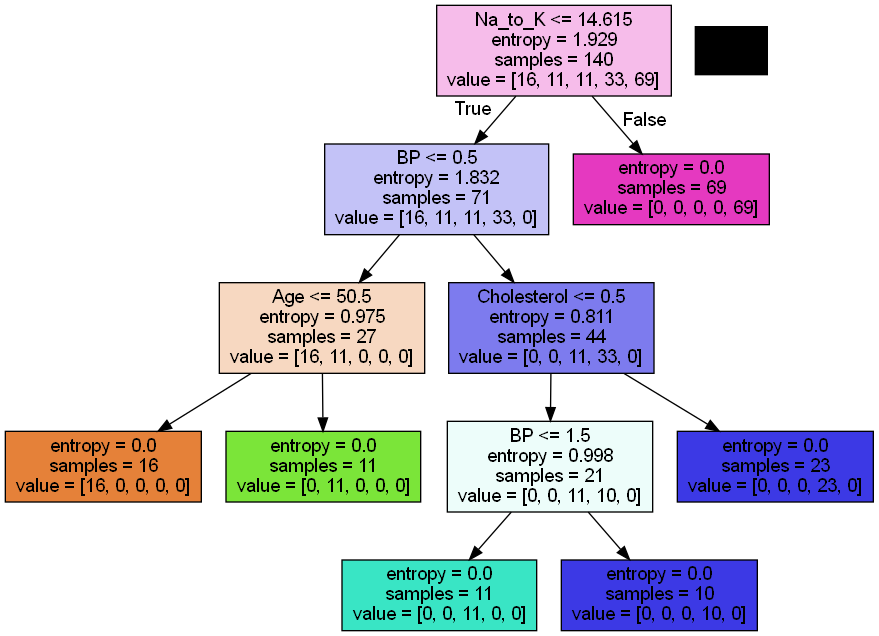

In [24]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(drugTree, out_file=None, filled=True, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])

import pydotplus
from IPython.display import Image

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())